In [1]:
import pandas as pd
import re
import nltk
import numpy as np
import pyarabic.araby as araby
nltk.download('wordnet')
pd.set_option('display.max_colwidth',100)
ps = nltk.ISRIStemmer()
wn = nltk.WordNetLemmatizer()

from nltk.corpus import stopwords
stopwords = nltk. corpus.stopwords.words('arabic')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arwaalgethami/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer, HashingVectorizer

In [3]:
Tweets = pd.read_csv('Tweets.csv' , parse_dates = ['created_at']).drop(columns='Unnamed: 0')

In [4]:
Tweets.drop(columns=['status_id' , 'screen_name', 'reply_to_status_id', 'reply_to_screen_name', 'country_code' , 'place_type' , 'friends_count'
                     , 'account_lang'], inplace=True)
Tweets.head(2)

,user_id,created_at,text,source,reply_to_user_id,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,followers_count,account_created_at,verified,lang
0,1007912996,2020-03-05 13:32:48+00:00,💔 #Covid_19 https://t.co/aZnkPZQSjI,Twitter for iPhone,NaN,False,False,1836,0,"Jeddah, Kingdom of Saudi Arabia",38,2012-12-13T03:31:31Z,False,und
1,990795015344533504,2020-03-05 16:14:42+00:00,Due to #Coronvirus #CoronaAlert #CoronavirusOutbreak #SaudiArabian #govt close #Mataf in #Masj...,Twitter for Android,NaN,False,False,190,0,Al-Masjid Al-Nabawi | المسجد النبوي,154,2018-04-30T03:28:34Z,False,ca


In [5]:
Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 14 columns):
user_id               2676 non-null int64
created_at            2676 non-null datetime64[ns, UTC]
text                  2676 non-null object
source                2676 non-null object
reply_to_user_id      230 non-null float64
is_quote              2676 non-null bool
is_retweet            2676 non-null bool
favourites_count      2676 non-null int64
retweet_count         2676 non-null int64
place_full_name       2676 non-null object
followers_count       2676 non-null int64
account_created_at    2676 non-null object
verified              2676 non-null bool
lang                  2676 non-null object
dtypes: bool(3), datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 237.9+ KB


In [6]:
def word_extraction(sentence):
    ignore = ['و', "أن", "مع", 'على' , 'إن' , 'كأن' , 'في' , 'أو' , 'او']    
    words = re.sub("[^\w]", " ",  sentence).split()    
    cleaned_text = " ".join([w.lower() for w in words if w not in ignore])
    return cleaned_text

In [7]:
Tweets['Tweets_word_extraction'] = Tweets['text'].apply(lambda x: word_extraction(x))
Tweets.head(1)

,user_id,created_at,text,source,reply_to_user_id,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,followers_count,account_created_at,verified,lang,Tweets_word_extraction
0,1007912996,2020-03-05 13:32:48+00:00,💔 #Covid_19 https://t.co/aZnkPZQSjI,Twitter for iPhone,NaN,False,False,1836,0,"Jeddah, Kingdom of Saudi Arabia",38,2012-12-13T03:31:31Z,False,und,covid_19 https t co aznkpzqsji


In [8]:
Tweets['Date'] = Tweets['created_at'].apply(lambda x: x.date())

In [9]:
Tweets = Tweets.sort_values(by='Date')
Tweets

,user_id,created_at,text,source,reply_to_user_id,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,followers_count,account_created_at,verified,lang,Tweets_word_extraction,Date
0,1007912996,2020-03-05 13:32:48+00:00,💔 #Covid_19 https://t.co/aZnkPZQSjI,Twitter for iPhone,NaN,False,False,1836,0,"Jeddah, Kingdom of Saudi Arabia",38,2012-12-13T03:31:31Z,False,und,covid_19 https t co aznkpzqsji,2020-03-05
1,990795015344533504,2020-03-05 16:14:42+00:00,Due to #Coronvirus #CoronaAlert #CoronavirusOutbreak #SaudiArabian #govt close #Mataf in #Masj...,Twitter for Android,NaN,False,False,190,0,Al-Masjid Al-Nabawi | المسجد النبوي,154,2018-04-30T03:28:34Z,False,ca,due to coronvirus coronaalert coronavirusoutbreak saudiarabian govt close mataf in masjidilharam...,2020-03-05
2,797587002,2020-03-05 19:30:27+00:00,#صحة_المدينة بالتعاون مع طيبة لتشغيل المطارات تفعل شاشات التوعية بمطار الأمير محمد بن عبدالعزيز ...,Twitter for iPhone,NaN,False,False,20,13,"Al Madinah Al Munawwarah, Kingdom of Saudi Arabia",51140,2012-09-02T05:36:44Z,True,ar,صحة_المدينة بالتعاون طيبة لتشغيل المطارات تفعل شاشات التوعية بمطار الأمير محمد بن عبدالعزيز الدو...,2020-03-05
3,1477524007,2020-03-06 13:23:17+00:00,#كورونا_الجديد \n#Covid_19 https://t.co/4R9hLwmTiW,Twitter for iPhone,NaN,False,False,1534,0,"Jeddah, Kingdom of Saudi Arabia",900,2013-06-02T15:01:52Z,False,und,كورونا_الجديد covid_19 https t co 4r9hlwmtiw,2020-03-06
4,292299682,2020-03-06 19:28:18+00:00,يعني الواحد مايدري يضحك ولا وش يسوي !! استغلال شنيع #Covid_19 https://t.co/8223V2pCLp,Twitter for iPhone,NaN,False,False,328,1,"Jeddah, Kingdom of Saudi Arabia",148,2011-05-03T12:40:03Z,False,ar,يعني الواحد مايدري يضحك ولا وش يسوي استغلال شنيع covid_19 https t co 8223v2pclp,2020-03-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,43212974,2020-03-28 13:05:09+00:00,#Hydroxychloroquine #بلاكونيل \nSystemic review \n#Covid_19 #COVID19 #COVIDー19 #Covid2019 \n\nht...,Twitter for iPhone,NaN,True,False,2390,2,"Riyadh, Kingdom of Saudi Arabia",5047,2009-05-28T22:30:01Z,False,en,hydroxychloroquine بلاكونيل systemic review covid_19 covid19 covidー19 covid2019 https t co d2p4i...,2020-03-28
2567,2325857863,2020-03-28 13:15:09+00:00,ارتفاع عدد المصابين بكورونا في السعودية إلى 1203 حالة https://t.co/PtU043MNYC\n#كورونا #خليك_ببي...,Twitter for Android,NaN,False,False,2447,0,"Jeddah, Kingdom of Saudi Arabia",710,2014-02-03T18:12:18Z,False,ar,ارتفاع عدد المصابين بكورونا السعودية إلى 1203 حالة https t co ptu043mnyc كورونا خليك_ببيتك_وانشد...,2020-03-28
2568,1234910835614588929,2020-03-28 13:29:59+00:00,We riqvest prime minister to make #coronavirus test free of cost for Indian..,Twitter for Android,NaN,False,False,3,0,"Thuwal, Kingdom of Saudi Arabia",2,2020-03-03T18:38:01Z,False,en,we riqvest prime minister to make coronavirus test free of cost for indian,2020-03-28
2559,339496478,2020-03-28 12:26:46+00:00,YOUR DOSE OF GOOD NEWS:\n1. #G20 leaders pledge $5 trillion into the global economy💸. 2. Li...,Twitter for iPhone,NaN,False,False,12995,2,"Riyadh, Kingdom of Saudi Arabia",48498,2011-07-21T05:56:32Z,True,en,your dose of good news 1 g20 leaders pledge 5 trillion into the global economy 2 lights off for ...,2020-03-28


In [17]:
Tweets['Date'] = Tweets['Date'].astype(str)

In [18]:
#CountVectorizer
count_vect = CountVectorizer(stop_words=stopwords)

In [22]:
#HERE YOU WILL PUT YOUR PERIOD OF TIME
Tweets[Tweets['Date'].between('2020-03-09','2020-03-11')]

,user_id,created_at,text,source,reply_to_user_id,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,followers_count,account_created_at,verified,lang,Tweets_word_extraction,Date
17,445408868,2020-03-09 21:09:22+00:00,#عاجل: #ايطاليا تقرر عزل البلاد بالكامل.\n\nوالتنبيه لجميع السكان على البقاء في منازلهم لحين تجا...,Twitter for iPhone,NaN,False,False,8895,0,"Riyadh, Kingdom of Saudi Arabia",126688,2011-12-24T11:02:04Z,False,ar,عاجل ايطاليا تقرر عزل البلاد بالكامل والتنبيه لجميع السكان البقاء منازلهم لحين تجاوز الأزمة كورو...,2020-03-09
16,3250609508,2020-03-09 16:10:50+00:00,Wash your damn hand \n#COVID19 #CoronavirusOutbreak \n https://t.co/leOBt1jqLq,Twitter for iPhone,NaN,False,False,881,9,"Riyadh, Kingdom of Saudi Arabia",481,2015-06-20T11:22:19Z,False,en,wash your damn hand covid19 coronavirusoutbreak https t co leobt1jqlq,2020-03-09
15,1230056864404135937,2020-03-09 10:41:27+00:00,#CoronavirusOutbreak,Twitter for Android,NaN,False,False,8,1,"Riyadh, Kingdom of Saudi Arabia",9,2020-02-19T09:09:55Z,False,und,coronavirusoutbreak,2020-03-09
13,1208666879159603200,2020-03-09 08:59:33+00:00,#CoronavirusOutbreak https://t.co/edAiBbahnq,Twitter for Android,NaN,False,False,648,0,In The Middle of Nowhere,41,2019-12-22T08:33:43Z,False,und,coronavirusoutbreak https t co edaibbahnq,2020-03-09
12,122862514,2020-03-09 08:05:32+00:00,Tips on How to Protect Yourself and Help in Preventing the Spread of Corona Virus 2019 (COVID-19...,Twitter for Android,NaN,False,False,178,0,"Dhahran, Kingdom of Saudi Arabia",129,2010-03-14T04:55:05Z,False,en,tips on how to protect yourself and help in preventing the spread of corona virus 2019 covid 19 ...,2020-03-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,2708077485,2020-03-11 14:24:11+00:00,When is #SouthAfrica government #Government gonna start responding to #COVID19 by limiting mo...,Twitter for Android,NaN,False,False,385,0,"Tabuk, Kingdom of Saudi Arabia",33,2014-07-13T20:19:22Z,False,en,when is southafrica government government gonna start responding to covid19 by limiting movement...,2020-03-11
54,1308009132,2020-03-11 14:18:25+00:00,#COVID19 they found the Cure 😂😭 OMG #meme #funny https://t.co/mAAeryM3Wi,Twitter for iPhone,NaN,False,False,3894,0,"Riyadh, Kingdom of Saudi Arabia",386,2013-03-27T17:01:20Z,False,en,covid19 they found the cure omg meme funny https t co maaerym3wi,2020-03-11
53,399496634,2020-03-11 13:50:54+00:00,#COVID19 #CoronaVirusUpdate https://t.co/vcpMHZcogE,Twitter for iPhone,NaN,False,False,7550,0,"Riyadh, Kingdom of Saudi Arabia",938,2011-10-27T15:50:26Z,False,und,covid19 coronavirusupdate https t co vcpmhzcoge,2020-03-11
57,1235832981513633797,2020-03-11 15:06:57+00:00,🚨📣🚨📣🚨\nخدماتنا كثير ومنها: \n1. إنشاء وتجديد السجلات التجارية وإلغاءها\n2. جميع الاجراءات المتعل...,Twitter for iPhone,NaN,False,False,0,1,"Dammam, Kingdom of Saudi Arabia",5,2020-03-06T07:42:12Z,False,ar,خدماتنا كثير ومنها 1 إنشاء وتجديد السجلات التجارية وإلغاءها 2 جميع الاجراءات المتعلقة بالوزارات ...,2020-03-11


In [23]:
count_vect.fit_transform(Tweets[Tweets['Date'].between('2020-03-09','2020-03-11')]['Tweets_word_extraction'])

<82x903 sparse matrix of type '<class 'numpy.int64'>'
	with 1403 stored elements in Compressed Sparse Row format>

In [24]:
count_vect.vocabulary_

{'عاجل': 655,
 'ايطاليا': 511,
 'تقرر': 564,
 'عزل': 665,
 'البلاد': 385,
 'بالكامل': 527,
 'والتنبيه': 801,
 'لجميع': 715,
 'السكان': 422,
 'البقاء': 384,
 'منازلهم': 772,
 'لحين': 717,
 'تجاوز': 548,
 'الأزمة': 360,
 'كورونا_الجديد': 704,
 'covid19': 73,
 'coronavirusoutbreak': 65,
 'covidー19': 76,
 'wash': 289,
 'your': 313,
 'damn': 81,
 'hand': 121,
 'https': 130,
 'co': 58,
 'leobt1jqlq': 150,
 'edaibbahnq': 95,
 'tips': 268,
 'on': 194,
 'how': 128,
 'to': 271,
 'protect': 218,
 'yourself': 314,
 'and': 30,
 'help': 126,
 'in': 134,
 'preventing': 215,
 'the': 261,
 'spread': 249,
 'of': 190,
 'corona': 61,
 'virus': 285,
 '2019': 9,
 'covid': 72,
 '19': 8,
 'coronavirus': 63,
 'howtoprotectyourselffromcoronaviru': 129,
 'tipstoprotecandpreventcoronavirus': 269,
 'qzw79yr8tw': 223,
 'rvfws5h80q': 234,
 'coronavid19': 62,
 'coronaviruschallenge': 64,
 '2020': 10,
 'qatif': 220,
 '4znij0nb8y': 14,
 'فديو': 675,
 'توعوي': 571,
 'لوزارة': 739,
 'الصحه': 428,
 'فايرس': 672,
 'كرونا':

In [25]:
pd.DataFrame(count_vect.vocabulary_.items() ,  columns=['word', 'count']).sort_values(by='count', ascending = False)

,word,count
328,یاب,902
330,ہے,901
335,ہیں,900
329,ہوگیا,899
336,ہونے,898
...,...,...
548,1000,4
229,10,3
811,0pickhsmnz,2
403,03,1


----------------

In [ ]:
##CASES 

In [20]:
cases_df = pd.read_csv('datasets/cases_.csv')

In [26]:
cases_df = cases_df[cases_df['location'] == 'Saudi Arabia']
cases_df

,location,indicator,Unit,Date,Value
0,Saudi Arabia,Confirmed Cases,Number,03/02/2020,1
1,Saudi Arabia,Confirmed Cases,Number,03/03/2020,1
2,Saudi Arabia,Confirmed Cases,Number,03/04/2020,1
3,Saudi Arabia,Confirmed Cases,Number,03/05/2020,5
4,Saudi Arabia,Confirmed Cases,Number,03/06/2020,5
...,...,...,...,...,...
77,Saudi Arabia,Recovered Cases,Number,03/30/2020,115
78,Saudi Arabia,Recovered Cases,Number,03/31/2020,165
79,Saudi Arabia,Recovered Cases,Number,04/01/2020,264
80,Saudi Arabia,Recovered Cases,Number,04/02/2020,328


In [76]:
wide_cases_df = pd.pivot_table(cases_df, columns=['indicator'], values='Value', index=['location','Date'],
                               fill_value=0, aggfunc = sum)
wide_cases_df = wide_cases_df.reset_index()

In [77]:
wide_cases_df.columns

Index(['location', 'Date', 'Active Cases', 'Confirmed Cases', 'Deaths',
       'Recovered Cases'],
      dtype='object', name='indicator')

In [78]:
wide_cases_df = wide_cases_df.drop(columns=['location'] , axis=0).reset_index()

In [79]:
wide_cases_df

indicator,index,Date,Active Cases,Confirmed Cases,Deaths,Recovered Cases
0,0,03/02/2020,0,1,0,0
1,1,03/03/2020,0,1,0,0
2,2,03/04/2020,0,1,0,0
3,3,03/05/2020,0,5,0,0
4,4,03/06/2020,0,5,0,0
5,5,03/07/2020,0,5,0,0
6,6,03/08/2020,0,11,0,0
7,7,03/09/2020,0,15,0,0
8,8,03/10/2020,0,20,0,1
9,9,03/11/2020,0,21,0,1


In [80]:
wide_cases_df.set_index('Date').head(2)

indicator,index,Active Cases,Confirmed Cases,Deaths,Recovered Cases
Date,,,,,
03/02/2020,0,0,1,0,0
03/03/2020,1,0,1,0,0


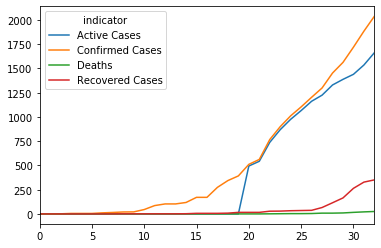

In [49]:
long_cases_df[['Active Cases','Confirmed Cases','Deaths','Recovered Cases']].plot();